In [1]:
import pandas as pd
data=pd.read_csv(r'C:\Users\asjas\OneDrive\Documents\Docker projects\churn-retention-forecasting\data\raw\customer_churn_dataset-training-master.csv')
data

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [2]:
data.shape

(440833, 12)

In [3]:
data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [4]:
data.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [5]:
data[data.isnull().any(axis=1)]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Only one row is completely empty and no other cell is null

In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
data.nunique()

CustomerID           440832
Age                      48
Gender                    2
Tenure                   60
Usage Frequency          30
Support Calls            11
Payment Delay            31
Subscription Type         3
Contract Length           3
Total Spend           68363
Last Interaction         30
Churn                     2
dtype: int64

The cardinality is not very high for categorical columns (Gender, Subscription type, contract length)

In [8]:
data.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [9]:
'''
Problems Detected:
- Customer ID starts from 2 instead of 1
- ID is in format 'x.0' instead of 'x'
- 1 missing row needs to be dropped

'''

"\nProblems Detected:\n- Customer ID starts from 2 instead of 1\n- ID is in format 'x.0' instead of 'x'\n- 1 missing row needs to be dropped\n\n"

In [10]:
data

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


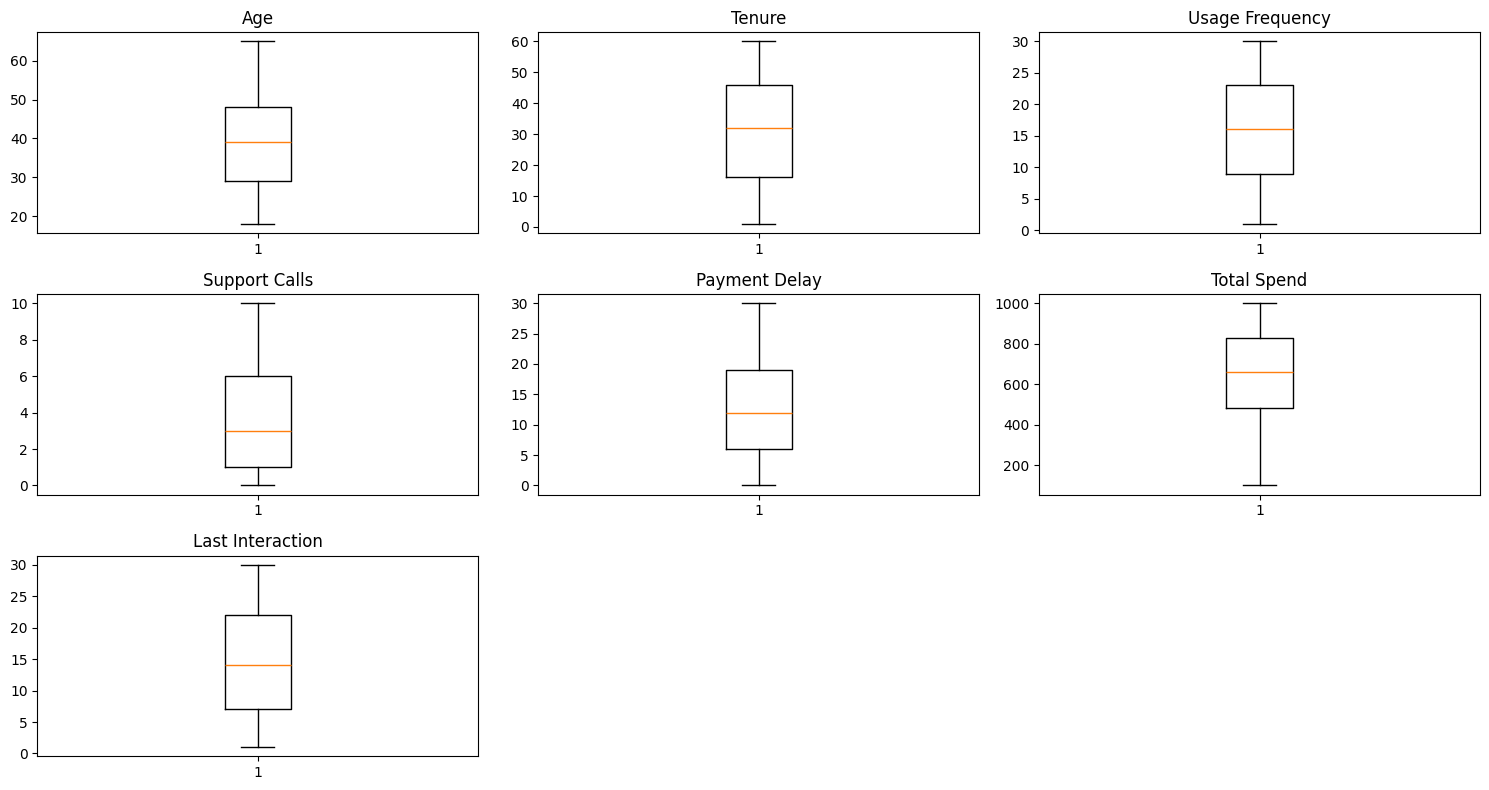

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols= ['Age',
    'Tenure',
    'Usage Frequency',
    'Support Calls',
    'Payment Delay',
    'Total Spend',
    'Last Interaction' ]

plt.figure(figsize=(15, 8))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    plt.boxplot(data[col].dropna())
    plt.title(col)

plt.tight_layout()
plt.show()

In [12]:
'''
Column wise interpretation

Age:
Right-skewed
No outlier

Tenure:
No skew - should confirm 
No outlier

Usage frequency:
No skew - should confirm
No outlier

Support calls:
Right skew
No outlier

Payment-delay:
Right skew
No outlier

Total spend:
Left skew
No outlier


Last interaction:
Right skew
No outlier
'''

'\nColumn wise interpretation\n\nAge:\nRight-skewed\nNo outlier\n\nTenure:\nNo skew - should confirm \nNo outlier\n\nUsage frequency:\nNo skew - should confirm\nNo outlier\n\nSupport calls:\nRight skew\nNo outlier\n\nPayment-delay:\nRight skew\nNo outlier\n\nTotal spend:\nLeft skew\nNo outlier\n\n\nLast interaction:\nRight skew\nNo outlier\n'

In [13]:
data[numerical_cols].skew()

Age                 0.162016
Tenure             -0.061402
Usage Frequency    -0.043473
Support Calls       0.666809
Payment Delay       0.267407
Total Spend        -0.457174
Last Interaction    0.176774
dtype: float64

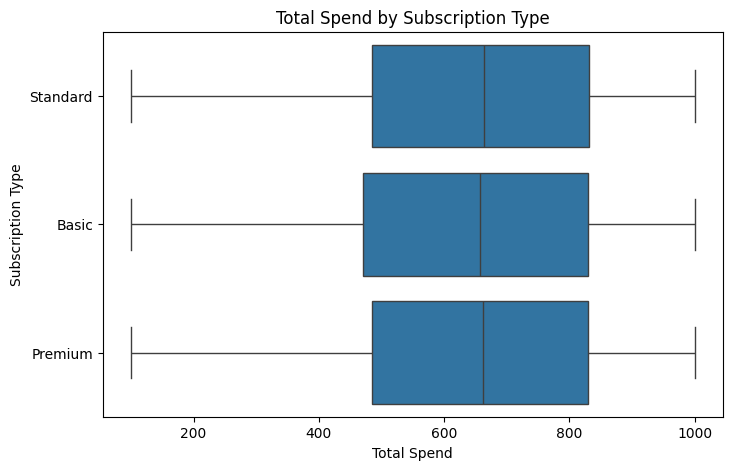

In [14]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='Total Spend',        # numerical → horizontal
    y='Subscription Type',  # categorical
    data=data
)
plt.title('Total Spend by Subscription Type')
plt.show()


Above plot lies in almost same range, i.e all Standard, Basic and Premium users spent same amount of money on website. 

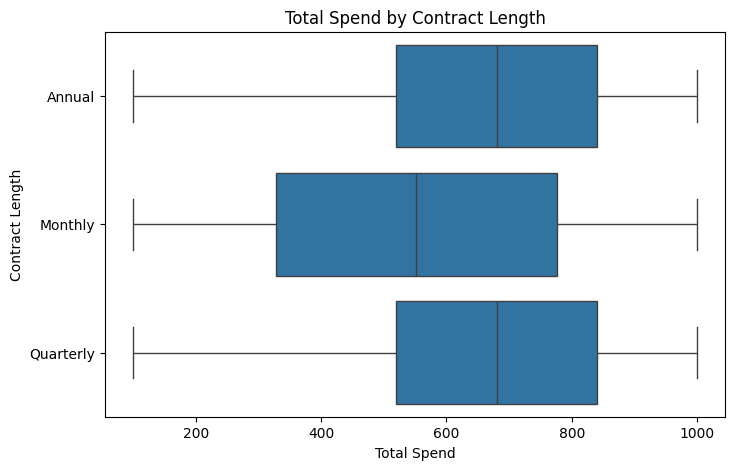

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='Total Spend',        
    y='Contract Length',  
    data=data
)
plt.title('Total Spend by Contract Length')
plt.show()

It looks like quarterly and annual subscribed customers spent almost equal amount of money and montly subscribers spent significantly less

Univariate Analayis

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868
std,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000
25%,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000
50%,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000
75%,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000


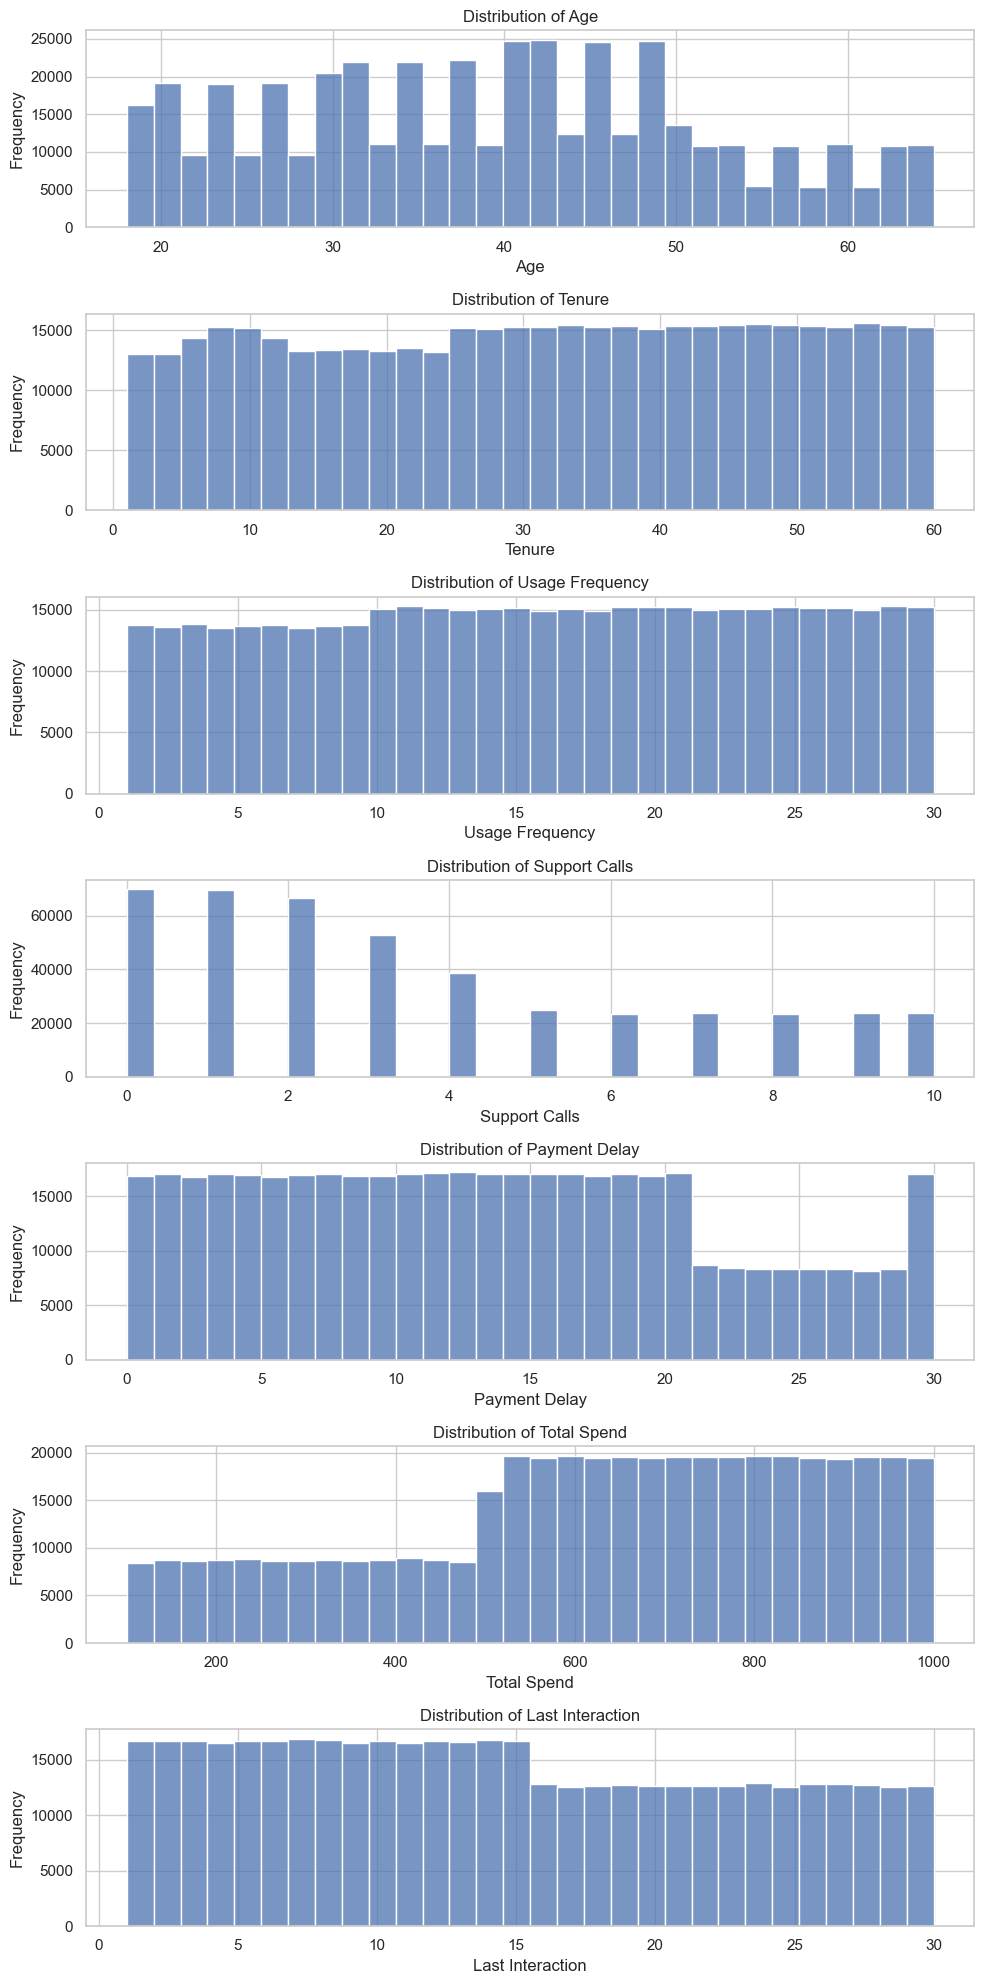

In [16]:
#Univariate analysis
numerical_summary=data[numerical_cols].describe()
#set the style of visualization
sns.set(style="whitegrid")

#plot histograms for numerical columns
fig, axs=plt.subplots(len(numerical_cols),1,figsize=(10,20))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(numerical_cols):
    sns.histplot(data[col], kde=False, ax=axs[i], bins=30)
    axs[i].set_title(f'Distribution of {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
numerical_summary

Customers in age group 40-50 are the top users, while users 15-40 are on middle ground but users above 50 years old use the telecom service the least.

Most of the customers either didn't contact or contacted the customer service <2 times, very few customers contacted more than 6 times.

Customers who spend more also buy more frequently, who interact more with Telecom service are also the ones to contact regularly - customer loyality.


In [17]:
#Bivariate analysis - we understand the causes here. 
'''
Think of your training data as 2 groups - predictors and target. We need to understand why target is the way it is in thie step.
We will perform this stags in 3 steps:
1. Categorical indicators vs Target
2. Numerical indicators vs Target
3. Multivariate analysis
'''


'\nThink of your training data as 2 groups - predictors and target. We need to understand why target is the way it is in thie step.\nWe will perform this stags in 3 steps:\n1. Categorical indicators vs Target\n2. Numerical indicators vs Target\n3. Multivariate analysis\n'

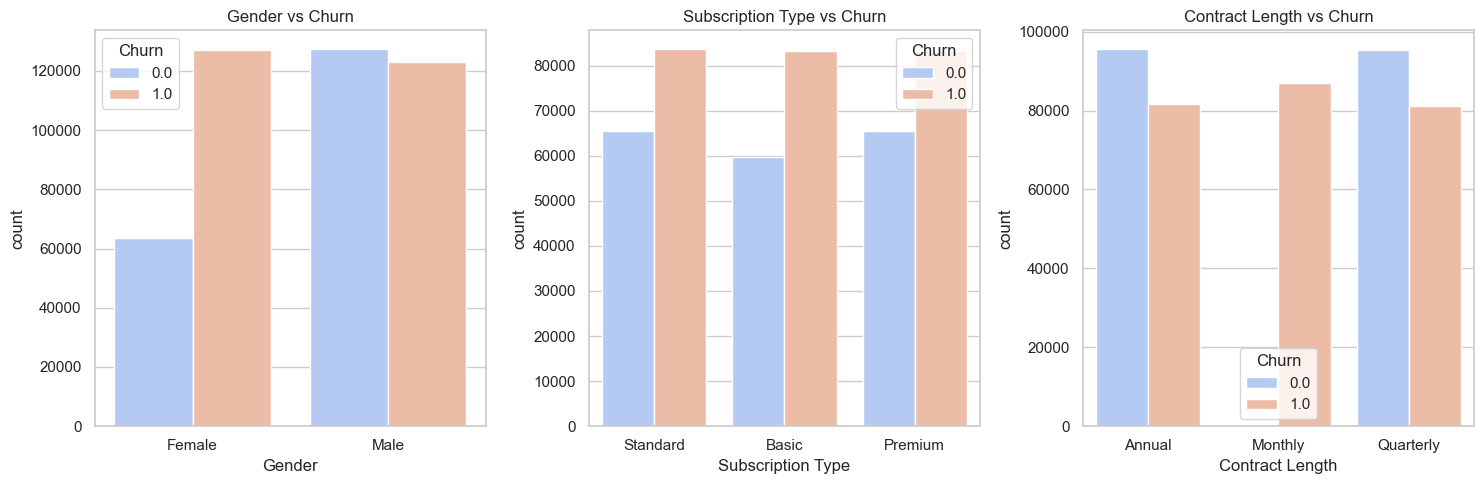

In [18]:
cat_cols=['Gender', 'Subscription Type', 'Contract Length']
plt.figure(figsize=(15, 5))
for i, col in enumerate(cat_cols):
    plt.subplot(1, 3, i+1)
    # The 'hue' argument splits the bars by Churn (Yes/No)
    sns.countplot(data=data, x=col, hue='Churn', palette='coolwarm')
    plt.title(f'{col} vs Churn')
plt.tight_layout()
plt.show()

We got great insights into our data as it is now very clear that customers with monthly contract stop using the service too. 

C:\Users\asjas\AppData\Local\Temp\ipykernel_4492\3652763190.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Churn', y=col, palette='Set2')
C:\Users\asjas\AppData\Local\Temp\ipykernel_4492\3652763190.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Churn', y=col, palette='Set2')
C:\Users\asjas\AppData\Local\Temp\ipykernel_4492\3652763190.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Churn', y=col, palette='Set2')
C:\Users\asjas\AppData\Local\Temp\ipykernel_4492\3652763190.py:5: FutureWarn

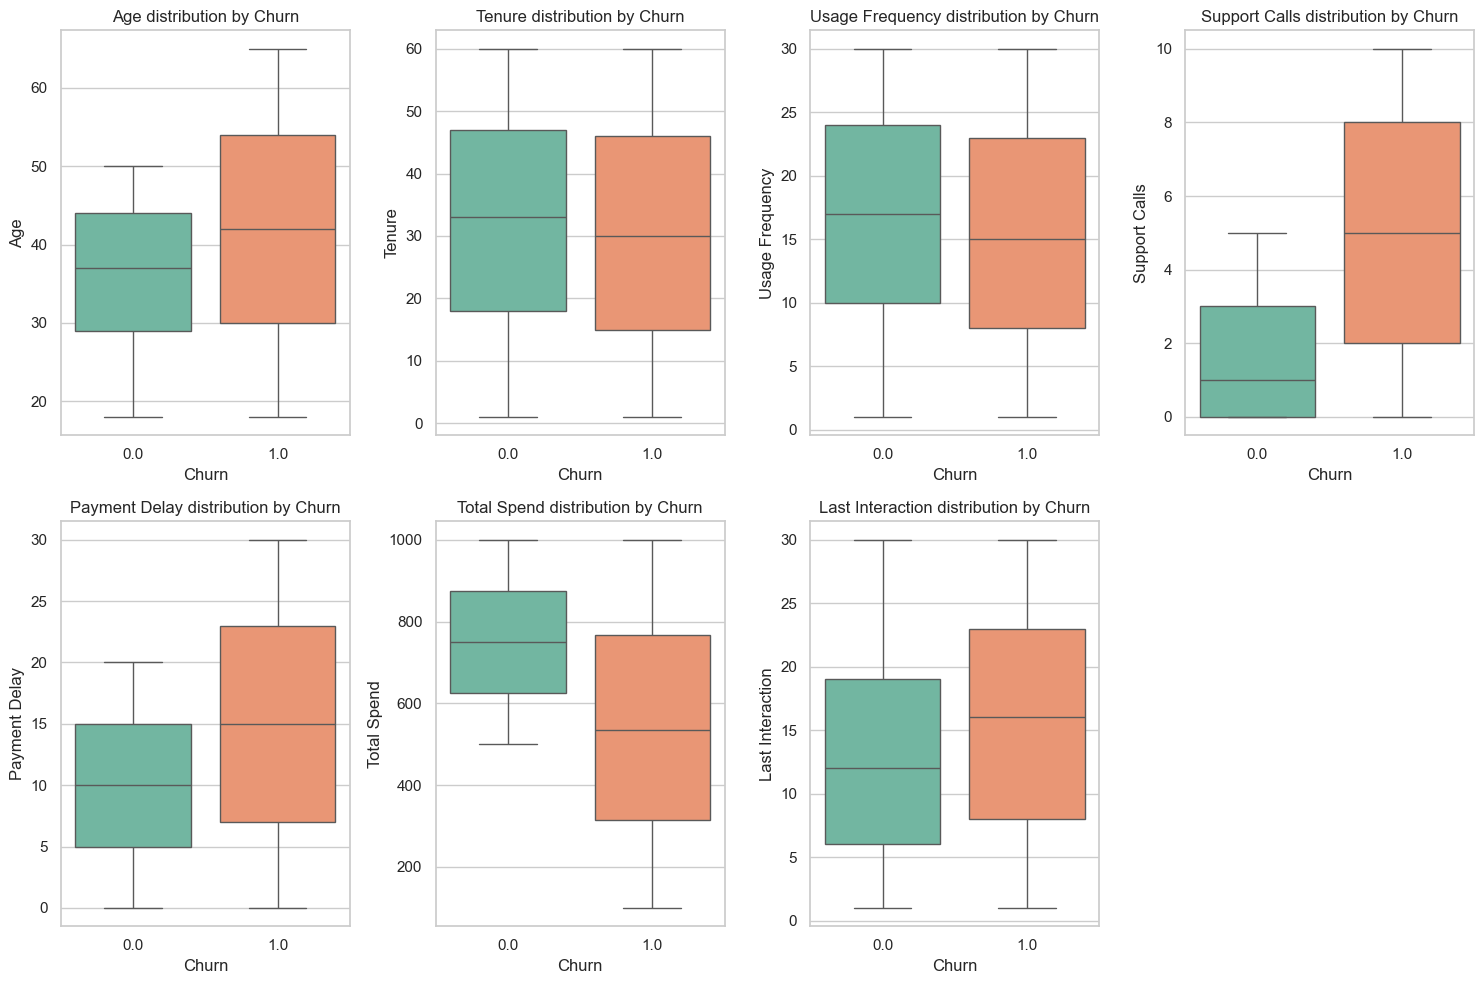

In [22]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 4, i+1)
    # x = Churn (Split groups), y = Numerical Column
    sns.boxplot(data=data, x='Churn', y=col, palette='Set2')
    plt.title(f'{col} distribution by Churn')
plt.tight_layout()
plt.show()


We can discover some amazing things from here:
1. Customers aged above 45 are most likely to stop using the service.
2. Customers who frequently called customer support, stopped using ther service - most likely poor support
3. Customers who delayed payments or spent less more than 15 days stop using the service - may be too expensive 
4. Customers who didn't interact for more than 20 days are likely to leave the service

c:\Users\asjas\OneDrive\Documents\Docker projects\churn-retention-forecasting\churn_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


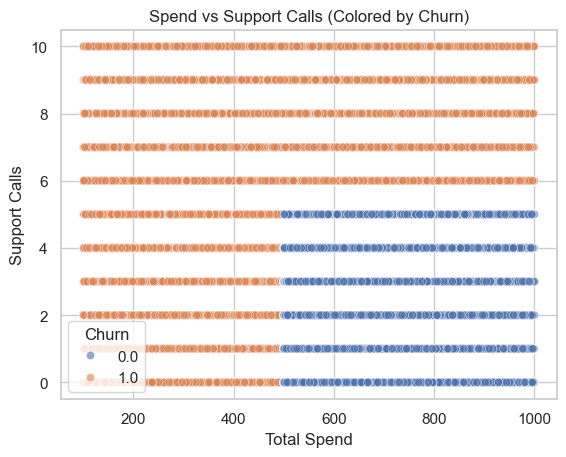

In [23]:
sns.scatterplot(data=data, x='Total Spend', y='Support Calls', hue='Churn', alpha=0.6)
plt.title('Spend vs Support Calls (Colored by Churn)')
plt.show()